# Рекомендации

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
films=pd.read_csv("IMDB_movies.csv", low_memory=False)

In [7]:
films.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [8]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


**Обработка данных**

In [9]:
films.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [10]:
df=films.copy()
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

In [11]:
df.drop(columns=["Rank","Runtime (Minutes)","Revenue (Millions)","Director","Actors"],axis=1,inplace=True)

In [12]:
df.head()

,Title,Genre,Description,Year,Rating,Votes,Metascore
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,2014,8.1,757074,76.0
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",2012,7.0,485820,65.0
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,2016,7.3,157606,62.0
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",2016,7.2,60545,59.0
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,2016,6.2,393727,40.0


Посмотрим наличие пустых и повторяющихся значений

In [13]:
missing_values = df.isnull().sum()
print(missing_values)

Title          0
Genre          0
Description    0
Year           0
Rating         0
Votes          0
Metascore      0
dtype: int64


In [14]:
duplicates = df.duplicated().sum()
print(duplicates)

0


Видим , что пустых и повторяющихся значений в датасете не осталось

Просмотрим значения в колонке Rating

In [15]:
df["Rating"].unique()

array([8.1, 7. , 7.3, 7.2, 6.2, 6.1, 8.3, 7.1, 7.5, 7.8, 7.9, 7.7, 6.4,
       6.6, 8.2, 6.7, 8. , 6.5, 5.3, 5.9, 6.3, 5.6, 8.6, 7.6, 6.9, 5.8,
       9. , 7.4, 4.1, 8.5, 6.8, 8.8, 5.4, 6. , 5.7, 8.4, 4.7, 5.2, 5.5,
       3.9, 4.9, 5.1, 4.3, 5. , 4.6, 4. , 1.9, 2.7, 4.4, 4.8])

Сохраним наш предобработанный файл

In [16]:
# Записать DataFrame в CSV файл
csv_file = 'IMDB-films.csv' # Имя файла, который мы хотим создать
df.to_csv(csv_file, index=False)

### Вывод топ-10 фильмов

In [17]:
def get_top_movies(df, n=10):
    sorted_df = df.sort_values(by='Rating', ascending=False)
    top_movies = sorted_df.head(n)[['Title', 'Rating']].to_dict(orient='records')
    return top_movies

In [18]:
top_movies_df = pd.DataFrame(get_top_movies(df))
print(top_movies_df)

                   Title  Rating
0        The Dark Knight     9.0
1              Inception     8.8
2           Interstellar     8.6
3          Kimi no na wa     8.6
4       The Intouchables     8.6
5  The Dark Knight Rises     8.5
6           The Departed     8.5
7           The Prestige     8.5
8       Taare Zameen Par     8.5
9    The Lives of Others     8.5


### Вывод топ-10 фильмов по жанрам

In [19]:
def filter_movies_by_genre(df, genre):
    return df[df['Genre'].str.contains(genre, case=False, na=False)]

def get_top_movies_by_genre(df, genre, n=10):
    genre_movies = filter_movies_by_genre(df, genre)
    sorted_genre_movies = genre_movies.sort_values(by='Rating', ascending=False)
    top_genre_movies = sorted_genre_movies.head(n)[['Title', 'Rating']].to_dict(orient='records')
    return top_genre_movies

In [20]:
top_movies_by_genre_df = pd.DataFrame(get_top_movies_by_genre(df,"Comedy"))
print(top_movies_by_genre_df)

                      Title  Rating
0          The Intouchables     8.6
1                  3 Idiots     8.4
2                        Up     8.3
3                La La Land     8.3
4               Toy Story 3     8.3
5                Inside Out     8.2
6                        PK     8.2
7   The Wolf of Wall Street     8.2
8                  Zootopia     8.1
9  The Grand Budapest Hotel     8.1


### Вывод топ-10 фильмов по контенту

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [22]:
# Создание объекта TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Преобразование текста в матрицу TF-IDF
tfidf_matrix = vectorizer.fit_transform(df['Description'])

Найдем наилучшее кол-во кластеров для метода k-means

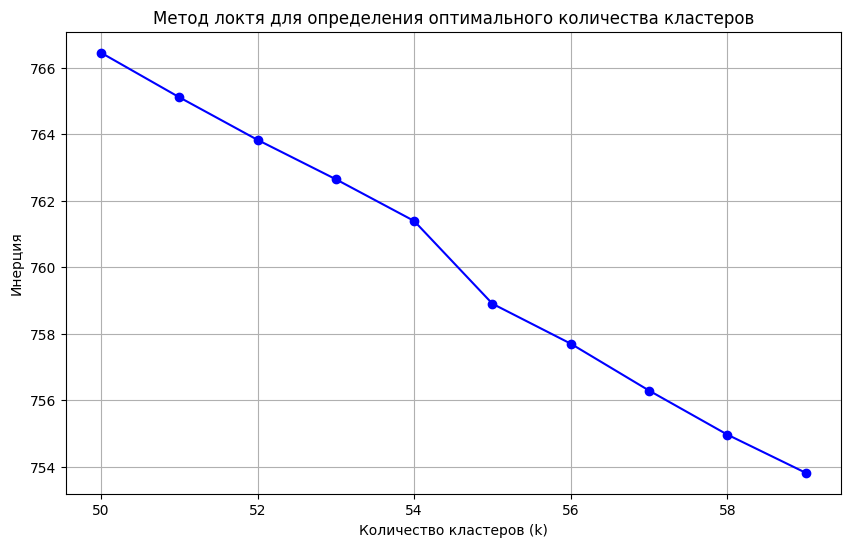

In [27]:
# Шаг 1: Обучение модели KMeans для различных значений количества кластеров
inertia = []
k_range = range(50, 60)  # Диапазон количества кластеров для тестирования

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    inertia.append(kmeans.inertia_)

# Шаг 2: Построение графика инерции в зависимости от количества кластеров
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Инерция')
plt.title('Метод локтя для определения оптимального количества кластеров')
plt.grid(True)
plt.show()

Возьмем 55 кластеров

In [31]:
# Обучение модели KMeans
num_clusters = 55  # Количество кластеров (можно настроить)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)
df['Cluster'] = kmeans.labels_

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        838 non-null    object 
 1   Genre        838 non-null    object 
 2   Description  838 non-null    object 
 3   Year         838 non-null    int64  
 4   Rating       838 non-null    float64
 5   Votes        838 non-null    int64  
 6   Metascore    838 non-null    float64
 7   Cluster      838 non-null    int32  
dtypes: float64(2), int32(1), int64(2), object(3)
memory usage: 49.2+ KB


In [33]:
def get_recommendations_by_content(df, title, n=10):
    # Find the index of the requested movie
    movie_index = df[df['Title'].str.lower() == title.lower()].index
    if movie_index.empty:
        return {"error": "Movie not found"}, 404

    movie_index = movie_index[0]
    movie_cluster = df.loc[movie_index, 'Cluster']

    # Get movies in the same cluster
    cluster_movies = df[df['Cluster'] == movie_cluster]
    recommended_movies = cluster_movies[cluster_movies.index != movie_index].head(n)[['Title', 'Rating']].to_dict(orient='records')

    return recommended_movies

In [34]:
films_recommendations_by_content_df = pd.DataFrame(get_recommendations_by_content(df,"Guardians of the Galaxy"))
print(films_recommendations_by_content_df)

                            Title  Rating
0                        The Help     8.1
1                The Great Gatsby     7.3
2                    Nightcrawler     7.9
3  Rise of the Planet of the Apes     7.6
4                 American Sniper     7.3
5                 American Hustle     7.3
6                        Coraline     7.7
7                        Movie 43     4.3
8                        Sinister     6.8
9                        The Drop     7.1


Визуализируем кластеры

In [35]:
from sklearn.decomposition import PCA

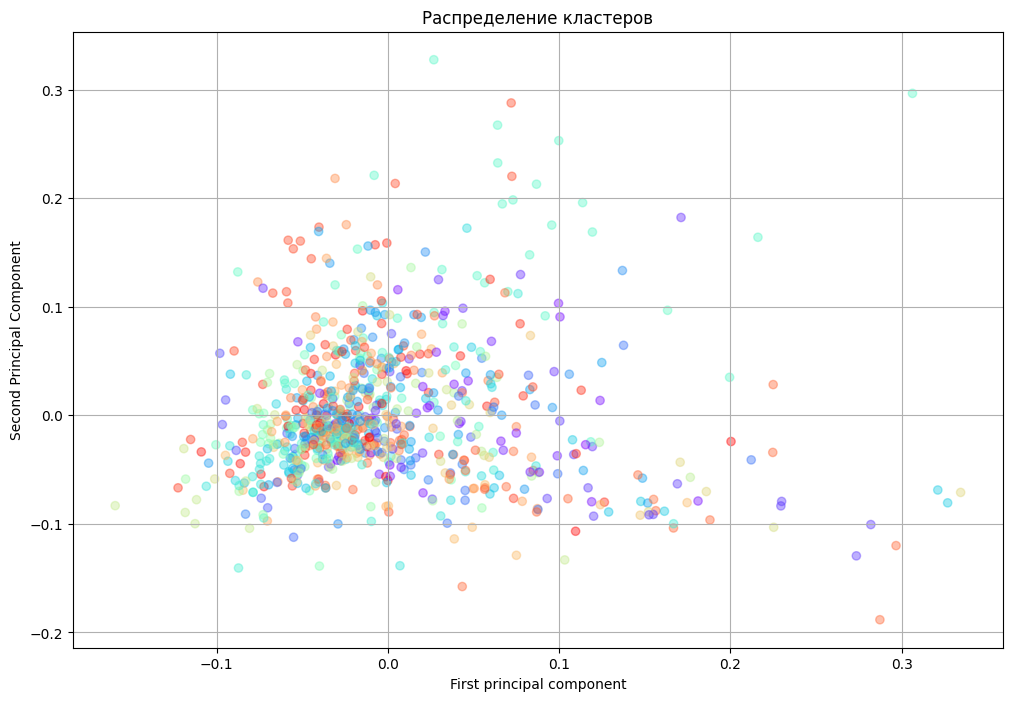

In [36]:
# Применение PCA для уменьшения размерности до 2 компонент
pca = PCA(n_components=2)
x_pca = pca.fit_transform(tfidf_matrix.toarray())

# График распределения кластеров в kmeans
plt.figure(figsize=(12, 8))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=df["Cluster"], cmap='rainbow', alpha=0.4)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('Распределение кластеров')
plt.grid(True)
plt.show()

# Анализ кластеров

Проанализировать 3 группы кластеров

Добавить эти 3 группы в графическую часть

In [51]:
from wordcloud import WordCloud

In [37]:
clusters_to_analyze = [0, 1, 2]

In [38]:
cluster_dfs = {cluster: df[df['Cluster'] == cluster] for cluster in clusters_to_analyze}

Анализ каждого кластера

In [55]:
#Описательная статистика:
for cluster, cluster_df in cluster_dfs.items():
    print(f"Cluster {cluster} statistics:")
    print(cluster_df.describe())
    print("\n")

Cluster 0 statistics:
              Year    Rating          Votes  Metascore  Cluster
count     7.000000  7.000000       7.000000   7.000000      7.0
mean   2010.428571  6.728571  258177.142857  59.142857      0.0
std       4.197505  0.884523  175268.396577  25.129190      0.0
min    2006.000000  5.600000   82701.000000  35.000000      0.0
25%    2006.500000  6.200000  117623.500000  39.000000      0.0
50%    2010.000000  6.600000  171970.000000  56.000000      0.0
75%    2014.500000  7.200000  403611.000000  75.000000      0.0
max    2015.000000  8.100000  510100.000000  95.000000      0.0


Cluster 1 statistics:
              Year     Rating         Votes  Metascore  Cluster
count    20.000000  20.000000      20.00000  20.000000     20.0
mean   2013.100000   6.685000   97683.95000  56.300000      1.0
std       3.110255   0.808686  117307.17062  13.389312      0.0
min    2006.000000   5.500000     702.00000  26.000000      1.0
25%    2011.000000   5.975000   30142.50000  50.000000    

In [56]:
#Частотный анализ для категориальных переменных:

for cluster, cluster_df in cluster_dfs.items():
    print(f"Cluster {cluster} genre counts:")
    print(cluster_df['Genre'].value_counts())
    print("\n")

Cluster 0 genre counts:
Genre
Drama,History                1
Biography,Drama              1
Drama                        1
Adventure,Sci-Fi,Thriller    1
Action,Adventure,Thriller    1
Action,Adventure,Fantasy     1
Drama,Fantasy,Mystery        1
Name: count, dtype: int64


Cluster 1 genre counts:
Genre
Drama,Romance                 2
Comedy,Drama                  2
Animation,Drama,Fantasy       1
Adventure,Family,Fantasy      1
Action,Adventure,Comedy       1
Action,Drama,Sci-Fi           1
Drama,Horror                  1
Mystery,Sci-Fi,Thriller       1
Drama,Fantasy,Romance         1
Horror                        1
Adventure,Drama,Fantasy       1
Comedy,Drama,Romance          1
Drama                         1
Animation,Adventure,Comedy    1
Comedy,Horror,Thriller        1
Comedy,Horror,Sci-Fi          1
Comedy,Drama,Music            1
Comedy,Drama,Musical          1
Name: count, dtype: int64


Cluster 2 genre counts:
Genre
Animation,Adventure,Comedy    2
Drama,War                    

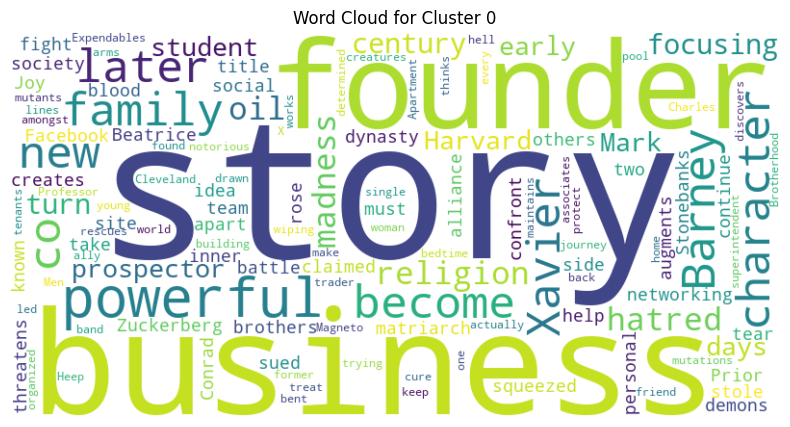

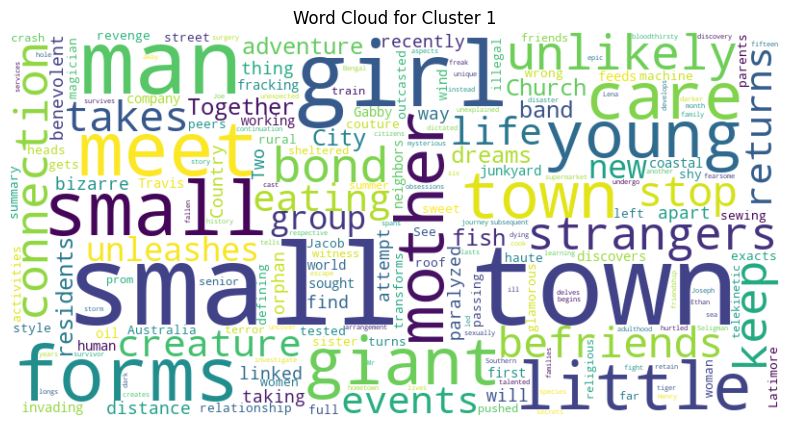

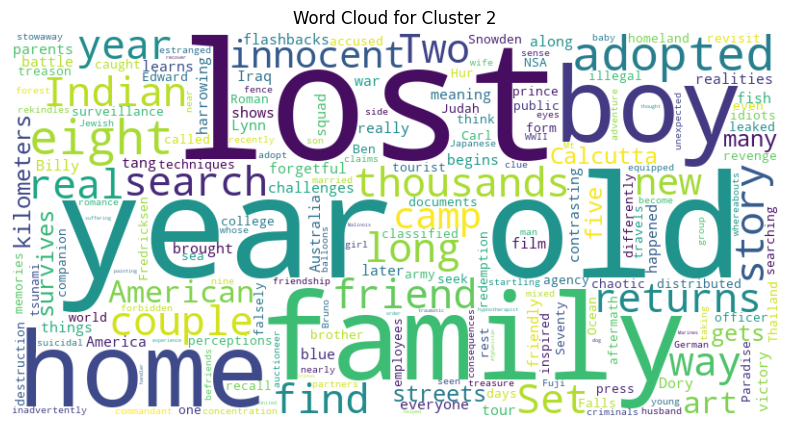

In [52]:
#Визуализация текстовых данных
for cluster, cluster_df in cluster_dfs.items():
    text = ' '.join(cluster_df['Description'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster {cluster}')
    plt.axis('off')
    plt.show()

Сравнение кластеров

In [57]:
#Сравнение средних значений:

comparison_df = pd.DataFrame({
    'Cluster': clusters_to_analyze,
    'Rating': [cluster_dfs[cluster]['Rating'].mean() for cluster in clusters_to_analyze]
})
print(comparison_df)

   Cluster    Rating
0        0  6.728571
1        1  6.685000
2        2  7.186667


# Вывод

K-Means нам однозначно не подходит!!!